In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import os
os.chdir('/content/drive/My Drive/IP Project/dataset')
!ls

circ-calc  Info.txt  Licence.txt  normal


### Importing important libraries

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import glob

%matplotlib inline

In [75]:
matplotlib.rcParams['figure.figsize'] = [20, 10]

In [5]:
abnormal_filenames=sorted(glob.glob('circ-calc/*.pgm'))
normal_filenames=sorted(glob.glob('normal/*.pgm'))
print(abnormal_filenames)
print(normal_filenames)

['circ-calc/mdb001.pgm', 'circ-calc/mdb002.pgm', 'circ-calc/mdb005.pgm', 'circ-calc/mdb010.pgm', 'circ-calc/mdb012.pgm', 'circ-calc/mdb021.pgm', 'circ-calc/mdb025.pgm', 'circ-calc/mdb132.pgm', 'circ-calc/mdb209.pgm', 'circ-calc/mdb211.pgm', 'circ-calc/mdb212.pgm', 'circ-calc/mdb213.pgm', 'circ-calc/mdb214.pgm', 'circ-calc/mdb222.pgm', 'circ-calc/mdb223.pgm', 'circ-calc/mdb226.pgm', 'circ-calc/mdb227.pgm']
['normal/mdb003.pgm', 'normal/mdb004.pgm', 'normal/mdb006.pgm', 'normal/mdb007.pgm', 'normal/mdb008.pgm', 'normal/mdb009.pgm', 'normal/mdb033.pgm', 'normal/mdb034.pgm', 'normal/mdb035.pgm', 'normal/mdb036.pgm', 'normal/mdb037.pgm', 'normal/mdb038.pgm', 'normal/mdb039.pgm', 'normal/mdb040.pgm', 'normal/mdb146.pgm', 'normal/mdb147.pgm', 'normal/mdb189.pgm', 'normal/mdb250.pgm', 'normal/mdb251.pgm', 'normal/mdb282.pgm', 'normal/mdb283.pgm', 'normal/mdb284.pgm']


### Vizualizing some examples from both classes

shape of each image (1024, 1024)


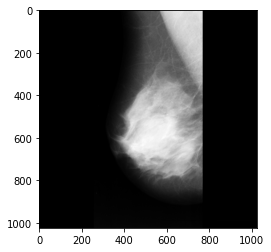

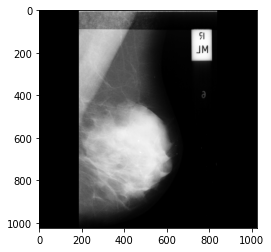

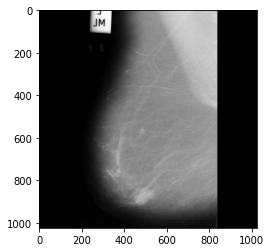

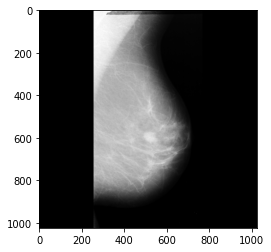

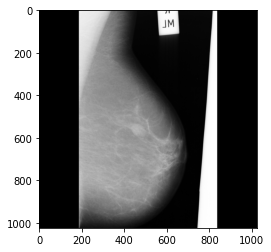

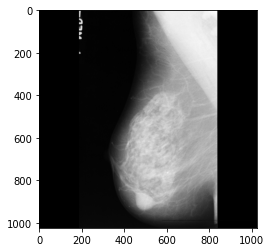

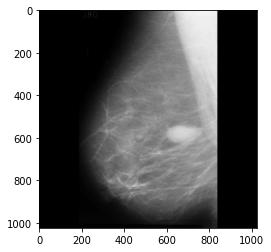

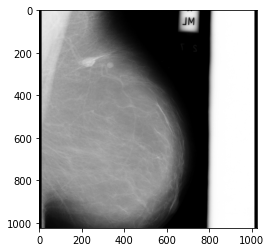

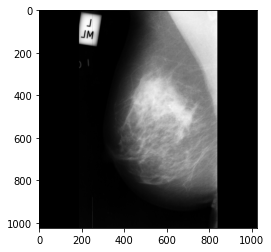

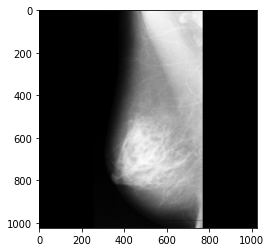

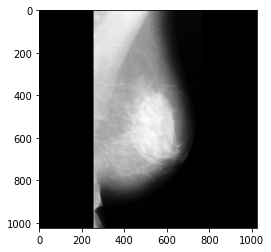

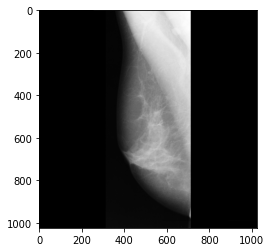

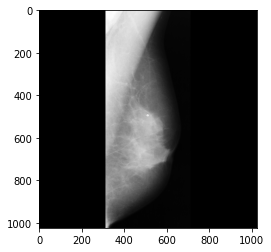

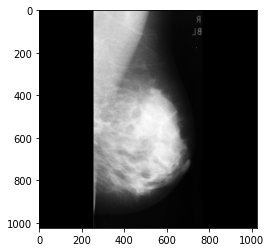

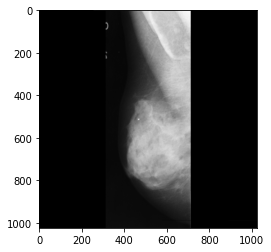

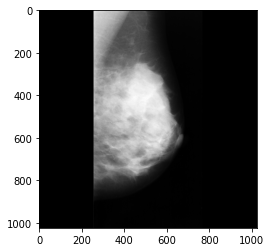

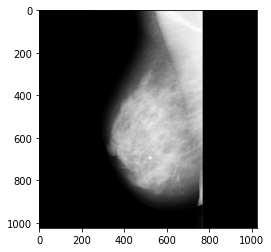

In [ ]:
for filename in abnormal_filenames:
    im = cv2.imread(filename, -1)
    plt.figure()
    plt.imshow(im, cmap='gray')
print('shape of each image',im.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


shape of each image (1024, 1024)


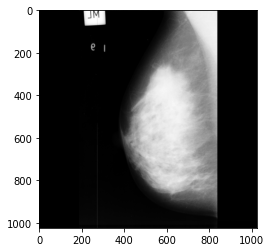

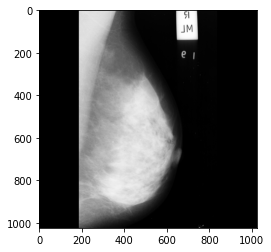

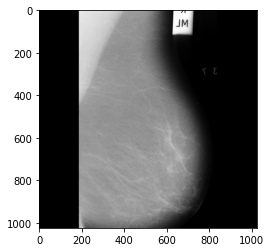

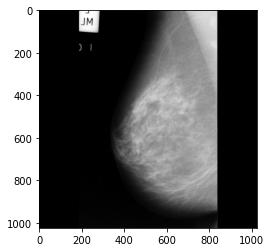

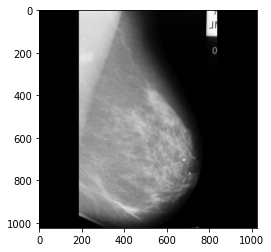

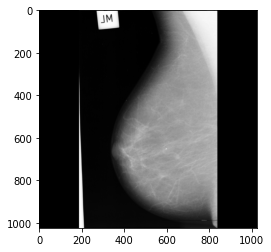

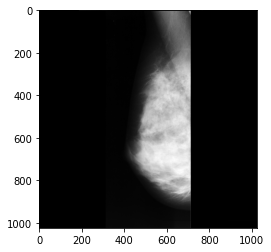

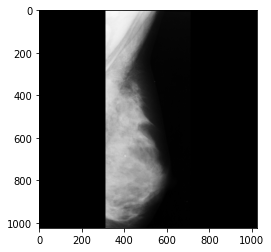

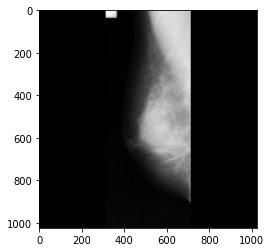

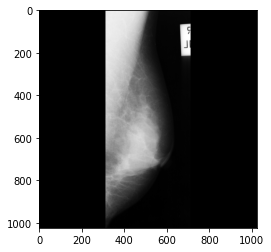

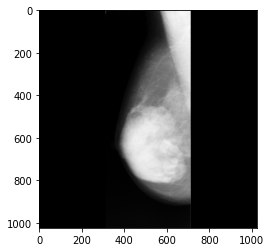

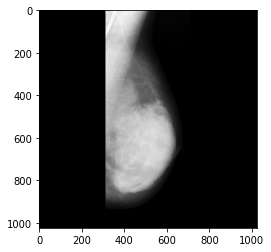

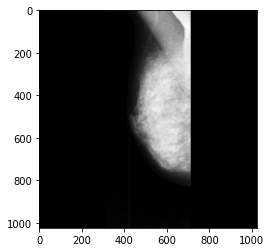

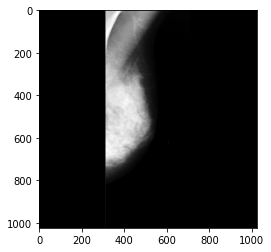

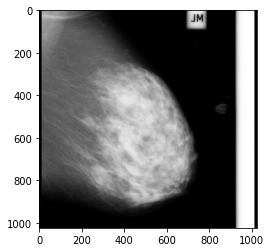

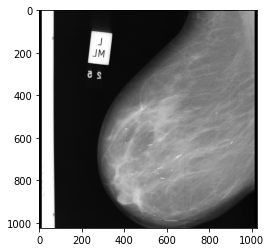

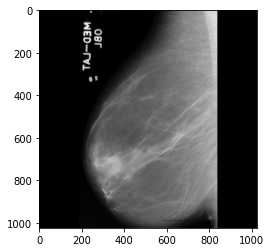

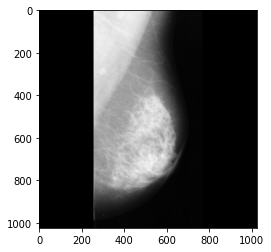

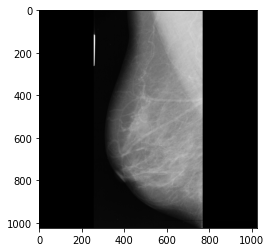

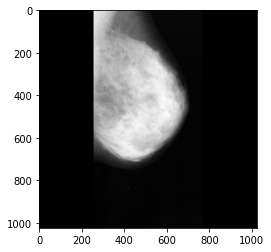

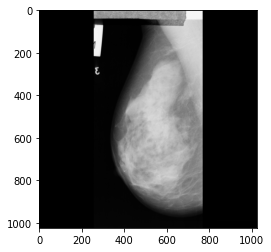

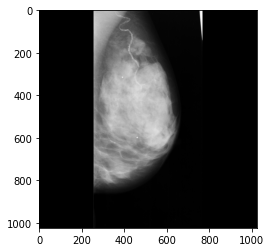

In [ ]:
for filename in normal_filenames:
    im = cv2.imread(filename, -1)
    plt.figure()
    plt.imshow(im, cmap='gray')
print('shape of each image',im.shape)

### Applying film artifact removal filter (1st Step)


We will find the mean of each pixel with a 3x3 and a 5x5 size kernel

First 3x3 kernel

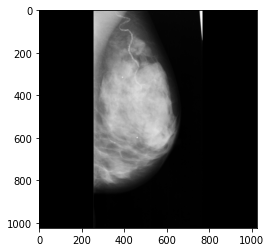

In [ ]:
def mean3x3(img):
    kernel = np.ones((3,3),np.float32)/9
    mean3 = cv2.filter2D(img,-1,kernel)
    plt.imshow(mean3, cmap='gray')
    return mean3

image = cv2.imread(normal_filenames[-1],-1)
mean3 = mean3x3(image)

Finding the difference between original image and averaged image

In [ ]:
diff3 = image-mean3
print(set(diff3.flatten()))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 40, 41, 42, 43, 44, 45, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 192, 193, 195, 199, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 213, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255}


{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158

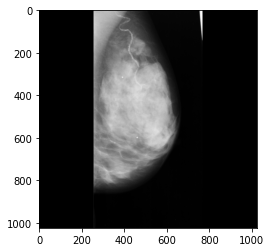

In [ ]:
S = np.ones((1024,1024))
T = 7

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if diff3[i][j]>T:
            S[i][j]=mean3[i][j]
        else:
            S[i][j]=image[i][j]
plt.imshow(S,cmap='gray')
print(set(S.flatten()))

Now with the 5x5 size kernel

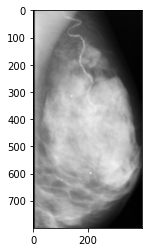

In [6]:
def mean5x5(img):
    kernel = np.ones((5,5),np.float32)/25
    mean5 = cv2.filter2D(img,-1,kernel)
    plt.imshow(mean5, cmap='gray')
    return mean5

image = cv2.imread(normal_filenames[-1],-1)
image = image[0:800,250:650]
mean5 = mean5x5(image)

In [7]:
diff5 = image-mean5
print(diff5.shape)
print(set(diff5.flatten()))

(800, 400)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255}


{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158

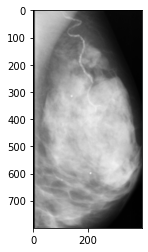

In [9]:
S = np.ones((800,400))
T = 3

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if diff5[i][j]>T:
            S[i][j]=mean5[i][j]
        else:
            S[i][j]=image[i][j]
plt.imshow(S,cmap='gray')
print(set(S.flatten()))

## Computing Gradient images (2nd step)

First the sobel and compass operators

(800, 400)


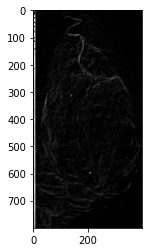

In [10]:
S1 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
S2 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
S = S.astype(np.uint8)
print(S.shape)
G1 = cv2.filter2D(S,-1,S1)
G2 = cv2.filter2D(S,-1,S2)

G=G1+G2
plt.imshow(G,cmap='gray')

In [11]:
print(set(G1.flatten()))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 96, 97, 98, 99, 101, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 115, 116}


In [12]:
print(set(G2.flatten()))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222

In [13]:
print(set(G.flatten()))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223,

Determining binary edge matrix to calculate g_k (signal adaptive gain)

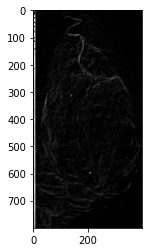

In [14]:
e = np.where(G>=127, 1, 0)
plt.imshow(G,cmap='gray')

In [15]:
np.max(e)

1

Calculating local standard deviation of filtered image S at each pixel using a window size (here 5)

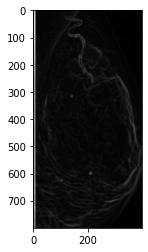

In [37]:
import scipy
def std_convoluted(image, N):
    im = np.array(image, dtype=float)
    im2 = im**2
    ones = np.ones(im.shape)

    kernel = np.ones((2*N+1, 2*N+1))
    s = scipy.ndimage.convolve(im, kernel, mode="nearest")
    s2 = scipy.ndimage.convolve(im2, kernel, mode="nearest")
    ns = scipy.ndimage.convolve(ones, kernel, mode="nearest")

    return np.sqrt((s2 - s**2 / ns) / ns)

S_sig = std_convoluted(S,2)
plt.imshow(S_sig,cmap='gray')

In [48]:
print(np.max(S_sig))

55.38265432425572


In [50]:
S_sig_max = np.max(S_sig)

55.38265432425572

Calculation of global mean and global standard deviation of the gradient images

In [18]:
G1_mean = np.mean(G1)
G2_mean = np.mean(G2)

G1_std = np.std(G1)
G2_std = np.std(G2)

print(G1_mean,G2_mean,G1_std,G2_std)

3.697871875 5.77450625 6.941680486098736 24.50411539555572


Calculationg maximum gain corresponding to each pixel, g_k_max 

In [24]:
sig_max = np.maximum(G1_std,G2_std)
sig_max

24.50411539555572

Calculating g_max for G1

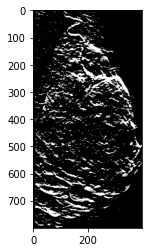

In [45]:
g_1_max = np.ones((800,400))

for i in range(G1.shape[0]):
    for j in range(G1.shape[1]):
        if abs(G1_mean-G1_std)<=G1[i][j] and G1[i][j]>=(G1_mean+G1_std):
            g_1_max[i][j]=(sig_max/G1_std)+(G1_std/(G1_std+G2_std))
        else:
            g_1_max[i][j]=sig_max/G1_std
plt.imshow(g_1_max,cmap='gray')


Calculating g_max for G2

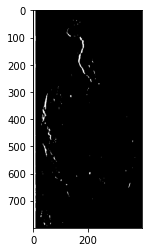

In [46]:
g_2_max = np.ones((800,400))

for i in range(G2.shape[0]):
    for j in range(G2.shape[1]):
        if abs(G2_mean-G2_std)<=G2[i][j] and G2[i][j]>=(G2_mean+G2_std):
            g_2_max[i][j]=(sig_max/G2_std)+(G2_std/(G1_std+G2_std))
        else:
            g_2_max[i][j]=sig_max/G2_std
plt.imshow(g_2_max,cmap='gray')


Calculation of signal adaptive gain for G1

In [47]:
print(np.max(g_1_max))


3.7507482605615934


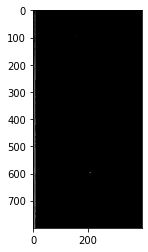

In [51]:
g_1 = np.ones((800,400))

for i in range(G1.shape[0]):
    for j in range(G1.shape[1]):
        if e[i][j]==1:
            g_1[i][j]=-1.0*((g_1_max[i][j]-1)*S_sig[i][j]/S_sig_max)+g_1_max[i][j]
        else:
            g_1[i][j]=1
plt.imshow(g_1,cmap='gray')

Calculation of signal adaptive gain for G2

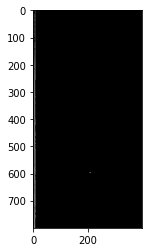

In [53]:
g_2 = np.ones((800,400))

for i in range(G2.shape[0]):
    for j in range(G2.shape[1]):
        if e[i][j]==1:
            g_2[i][j]=-1.0*((g_2_max[i][j]-1)*S_sig[i][j]/S_sig_max)+g_2_max[i][j]
        else:
            g_2[i][j]=1
plt.imshow(g_2,cmap='gray')

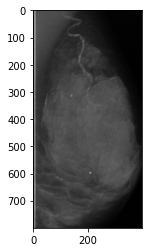

In [65]:
S_enhanced = S + np.multiply(g_1,G1) + np.multiply(g_2,G2)
plt.imshow(S_enhanced,cmap='gray')

In [66]:
np.max(S_enhanced)

578.0339191650714

In [67]:
S_enhanced = S_enhanced.astype('uint64')
print(set(S_enhanced.flatten()))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
for i in range(G2.shape[0]):
    for j in range(G2.shape[1]):
        if S_enhanced[i][j]>=255:
            S_enhanced[i][j]=255


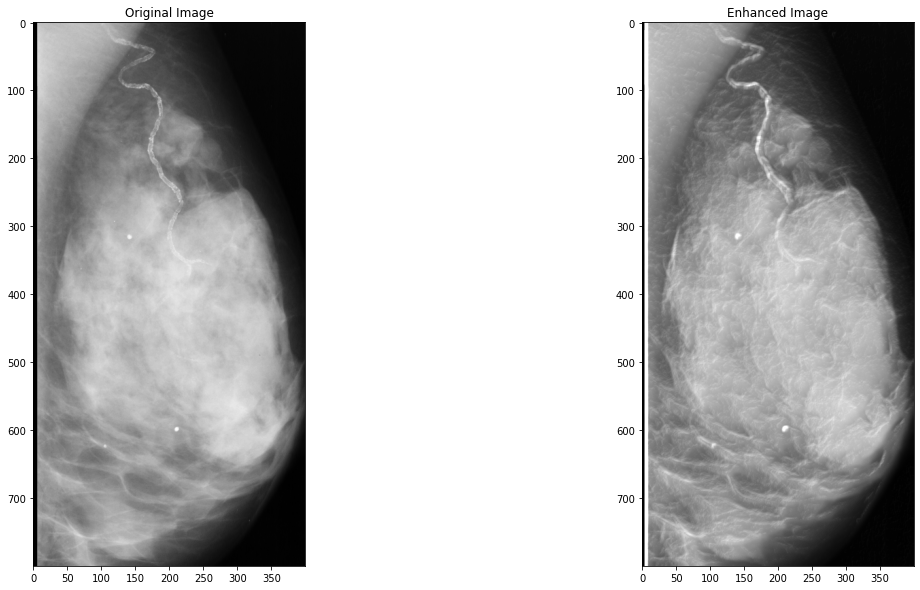

In [77]:
fig, axs = plt.subplots(1, 2)

axs[0].set_title('Original Image')
axs[0].imshow(image,cmap='gray')

axs[1].set_title('Enhanced Image')
axs[1].imshow(S_enhanced,cmap='gray')